In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/fish-measurements.csv', names=('A','B','C','D','E','F','G'))
df.head()

,A,B,C,D,E,F,G
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       85 non-null     object 
 1   B       85 non-null     float64
 2   C       85 non-null     float64
 3   D       85 non-null     float64
 4   E       85 non-null     float64
 5   F       85 non-null     float64
 6   G       85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [4]:
df.A.value_counts()

Bream    34
Roach    20
Pike     17
Smelt    14
Name: A, dtype: int64

In [5]:
samples = df.drop('A', axis=1)
samples = np.array(samples)
samples[:5,:]

array([[242. ,  23.2,  25.4,  30. ,  38.4,  13.4],
       [290. ,  24. ,  26.3,  31.2,  40. ,  13.8],
       [340. ,  23.9,  26.5,  31.1,  39.8,  15.1],
       [363. ,  26.3,  29. ,  33.5,  38. ,  13.3],
       [430. ,  26.5,  29. ,  34. ,  36.6,  15.1]])

In [6]:
targets = df['A']
targets = np.array(targets)
targets

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Pike', 'Pike',
       'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike',
       'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike'],
      dtype=object)

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(samples)
kmeans.inertia_

1923693.8383257915

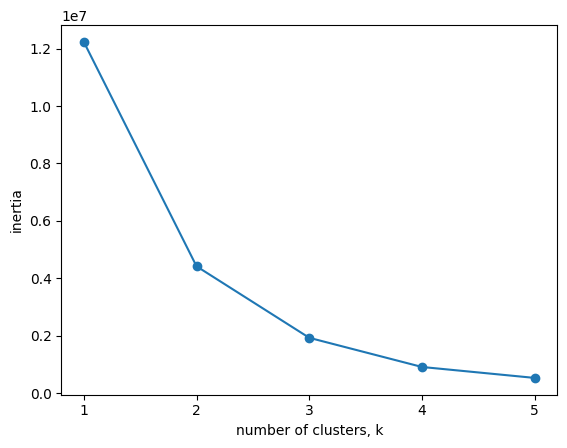

In [8]:
ks = range(1, 6)
inertias = []

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(samples)
    inertias.append(kmeans.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [9]:
inertias

[12236483.035294116,
 4415811.592684728,
 1923693.8383257915,
 907281.5585757575,
 525824.7125367647]

### Standardization

In [10]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4))])

In [27]:
kmeans.inertia_

98.61206407528323

### Heirarchical Clustering

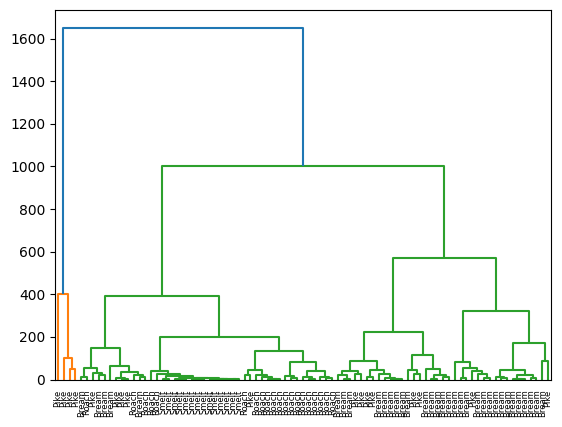

In [12]:
mergings = linkage(samples, method='complete')

dendrogram(mergings,
           labels=targets,
           leaf_rotation=90,
           leaf_font_size=6)

plt.show()

### Intrinsic Dimension

In [14]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(samples)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

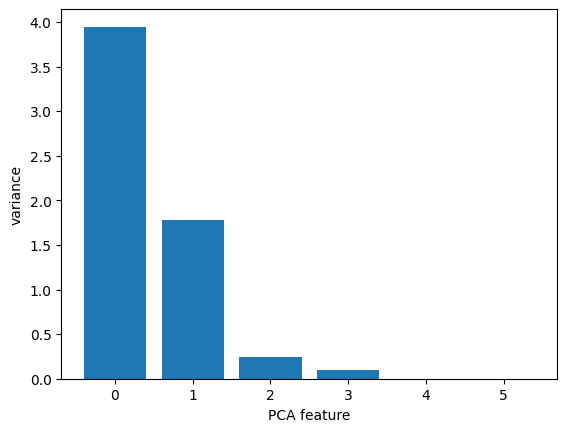

In [15]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### Dimension Reduction

In [17]:
scaler = StandardScaler()
pca = PCA(n_components=2)
pipeline = make_pipeline(scaler, pca)
pca_features = pipeline.fit_transform(samples)
pca_features.shape

(85, 2)